In [2]:
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def plot_country_graph(data):
    # Agrupando os dados por país e data, e somando os novos casos
    data_grouped = data.groupby(['Country', 'Date_reported'])['New_cases'].sum().reset_index()
        
    # Ordenando os dados por país e data
    data_grouped_sorted = data_grouped.sort_values(by=['Country', 'Date_reported'])
    
    # Gerando as cores para cada país
    colors = plt.cm.jet(np.linspace(0, 1, len(data_grouped_sorted['Country'].unique())))
    
    # Plotando o gráfico
    plt.figure(figsize=(15, 10))
    
    for (country, color) in zip(data_grouped_sorted['Country'].unique(), colors):
        country_data = data_grouped_sorted[data_grouped_sorted['Country'] == country]
        plt.plot(country_data['Date_reported'], country_data['New_cases'], color=color, linewidth=2)
    
    plt.xlabel('Data')
    plt.ylabel('Novos Casos')
    plt.title('Contaminação por COVID-19 ao longo do tempo por país')
    
    plt.show()

In [22]:
data = pd.read_csv('./Full_Northern_Countries.csv', encoding="utf-8")
# ==== Teste com Reuino Unido e Espanha ============================
# data = data[data['Country'].isin(['The United Kingdom', 'Spain'])]

# ============ Remoção da Namibia por ser um outlier gigantesco ===========
# data = data[data['Country'] != 'Namibia']


data['New_cases'] = pd.to_numeric(data['New_cases'], errors='coerce')

# ===== Usando somente dados positivos =============
# data = data[data['New_cases'] > 0]

data['Date_reported'] = pd.to_datetime(data['Date_reported'])
data = data.set_index(['Country_code', 'Date_reported'])


# ========== Tratando os dados =================================
data['Population'] = data['Population'].str.replace(',', '', regex=False)
data['Population'] = pd.to_numeric(data['Population'], errors='coerce')


# ================= Fazendo a média móvel ==================
data['New_cases'] = data['New_cases'].rolling(window=7).mean()

# ================ Fazendo a coluna New_cases ser relativa a população do país ============
data['Relative_New_Cases'] =  data['New_cases'] / data['Population']
data['New_cases']   = data['Relative_New_Cases']


# =========== Tratando os dados da coluna "Physicians per thousand" =========================
# data['Physicians per thousand'] = pd.to_numeric(data['Physicians per thousand'], errors='coerce')
data.rename(columns={'Physicians per thousand': 'Physicians_per_thousand'}, inplace=True)

# ========== Zerando valores negativos na coluna 'New_cases' ===================
# data.loc[data['New_cases'] < 0, 'New_cases'] = 0
# data_no_zeros  = data[data['New_cases'] > 0]
# new_cases = data_no_zeros['New_cases'].mean()
# data['New_cases'] = data['New_cases'].replace(0, new_cases)



# ============= Aplicando a normalização min-max à colunas desejadas =================
scaler = MinMaxScaler()
data['New_cases'] = scaler.fit_transform(data[['New_cases']])
# data['Population'] = scaler.fit_transform(data[['Population']])
# data['Urban_population'] = scaler.fit_transform(data[['Urban_population']])


data

Country WHO_region  New_cases  \
Country_code Date_reported                                      
AF           2020-01-03     Afghanistan       EMRO        NaN   
             2020-01-04     Afghanistan       EMRO        NaN   
             2020-01-05     Afghanistan       EMRO        NaN   
             2020-01-06     Afghanistan       EMRO        NaN   
             2020-01-07     Afghanistan       EMRO        NaN   
...                                 ...        ...        ...   
YE           2023-09-23           Yemen       EMRO   0.000081   
             2023-09-24           Yemen       EMRO   0.000081   
             2023-09-25           Yemen       EMRO   0.000081   
             2023-09-26           Yemen       EMRO   0.000081   
             2023-09-27           Yemen       EMRO   0.000081   

                            Cumulative_cases  New_deaths  Cumulative_deaths  \
Country_code Date_reported                                                    
AF           2020-01-03                    0           0                  0   
             2020-01-04                    0           0                  0   
             2020-01-05                    0           0                  0   
             2020-01-06                    0           0                  0   
             2020-01-07                    0           0                  0   
...                                      ...         ...                ...   
YE           2023-09-23                11945           0               2159   
             2023-09-24                11945           0               2159   
             2023-09-25                11945           0               2159   
             2023-09-26                11945           0               2159   
             2023-09-27                11945           0               2159   

                            season Abbreviation  Population Urban_population  \
Country_code Date_reported                                                     
AF           2020-01-03     winter           AF  38041754.0        9,797,273   
             2020-01-04     winter           AF  38041754.0        9,797,273   
             2020-01-05     winter           AF  38041754.0        9,797,273   
             2020-01-06     winter           AF  38041754.0        9,797,273   
             2020-01-07     winter           AF  38041754.0        9,797,273   
...                            ...          ...         ...              ...   
YE           2023-09-23     autumn           YE  29161922.0       10,869,523   
             2023-09-24     autumn           YE  29161922.0       10,869,523   
             2023-09-25     autumn           YE  29161922.0       10,869,523   
             2023-09-26     autumn           YE  29161922.0       10,869,523   
             2023-09-27     autumn           YE  29161922.0       10,869,523   

                            Physicians_per_thousand  Relative_New_Cases  
Country_code Date_reported                                               
AF           2020-01-03                        0.28                 NaN  
             2020-01-04                        0.28                 NaN  
             2020-01-05                        0.28                 NaN  
             2020-01-06                        0.28                 NaN  
             2020-01-07                        0.28                 NaN  
...                                             ...                 ...  
YE           2023-09-23                        0.31                 0.0  
             2023-09-24                        0.31                 0.0  
             2023-09-25                        0.31                 0.0  
             2023-09-26                        0.31                 0.0  
             2023-09-27                        0.31                 0.0  

[212784 rows x 12 columns]

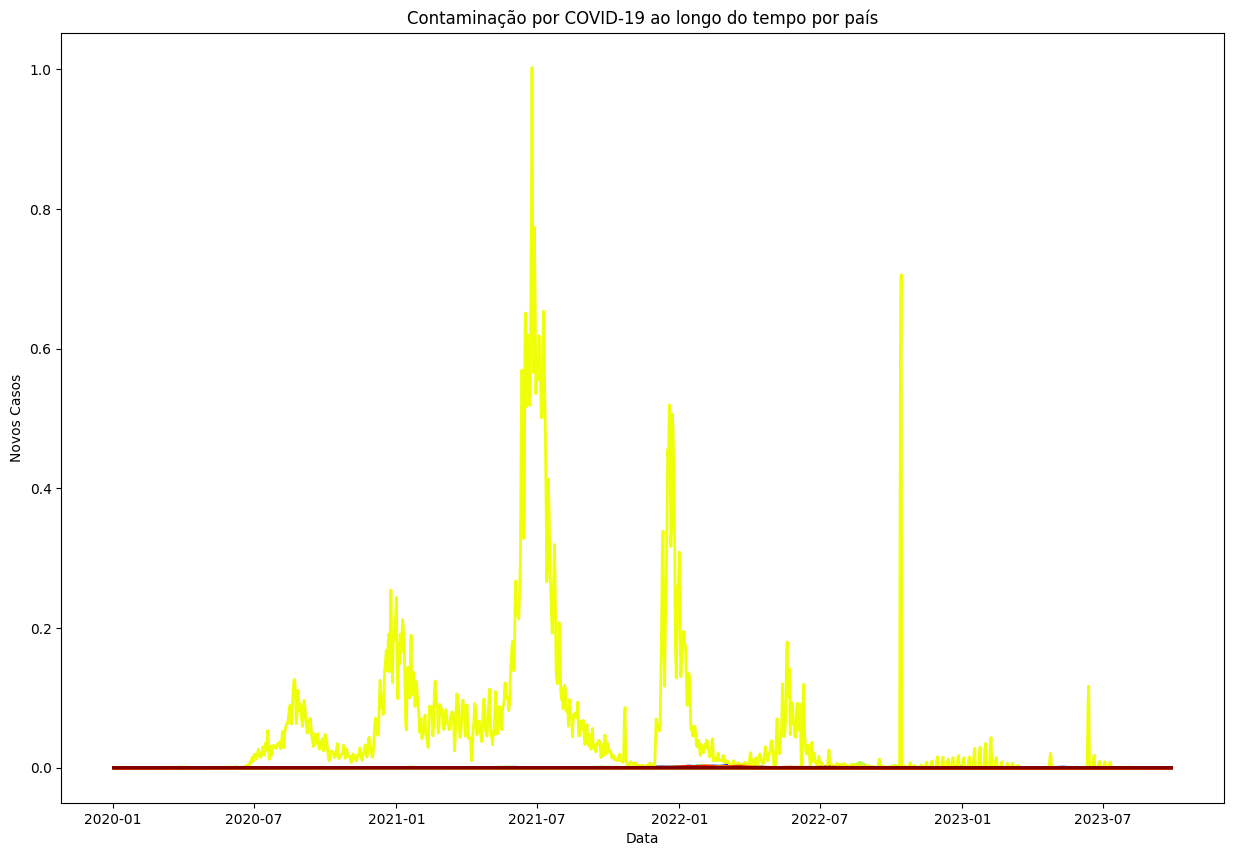

Maior valor na Coluna New_cases:                             Country WHO_region  New_cases  Cumulative_cases  \
Country_code Date_reported                                                    
NaN          2021-06-25     Namibia       AFRO        1.0             83698   

                            New_deaths  Cumulative_deaths  season  \
Country_code Date_reported                                          
NaN          2021-06-25             40               1345  summer   

                           Abbreviation  Population Urban_population  \
Country_code Date_reported                                             
NaN          2021-06-25             NaN       836.0              NaN   

                            Physicians_per_thousand  Relative_New_Cases  
Country_code Date_reported                                               
NaN          2021-06-25                         NaN            2.985646  
Segundo maior valor na Coluna New_cases:                             Country WHO_r

C:\Users\Gedor\AppData\Local\Temp\ipykernel_15828\2578958954.py:21: PerformanceWarning: indexing past lexsort depth may impact performance.
  lowest_value_tow = data.loc[index_lowest_value]


In [23]:
plot_country_graph(data)

# Mariores valores
higher_value = data['New_cases'].max()
higher_value_row = data[data["New_cases"] == higher_value]
print("Maior valor na Coluna New_cases:", higher_value_row)

second_higher_value = data['New_cases'].nlargest(2).iloc[-1]
second_higher_value_row = data[data["New_cases"] == second_higher_value]
print("Segundo maior valor na Coluna New_cases:", second_higher_value_row)

third_higher_value = data['New_cases'].nlargest(3).iloc[-1]
third_higher_value_row = data[data["New_cases"] == third_higher_value]
print("Terceiro maior valor na Coluna New_cases:", third_higher_value_row)


# Menores valores:
index_lowest_value = data['New_cases'].idxmin()

# Acessando a linha usando o índice encontrado
lowest_value_tow = data.loc[index_lowest_value]
print("Menor valor na Coluna New_cases:", lowest_value_tow)


<function matplotlib.pyplot.show(close=None, block=None)>

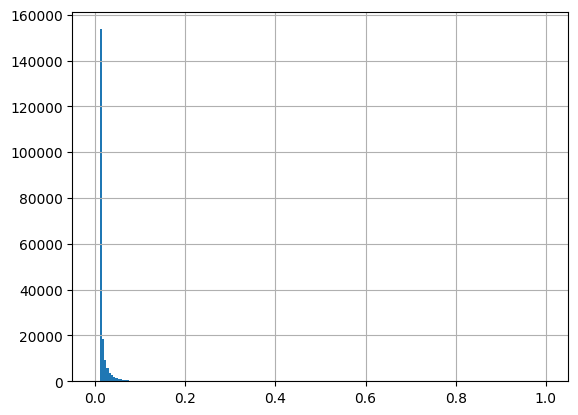

In [15]:
# Histograma dos New_cases
data['New_cases'].hist(bins=200)
plt.show

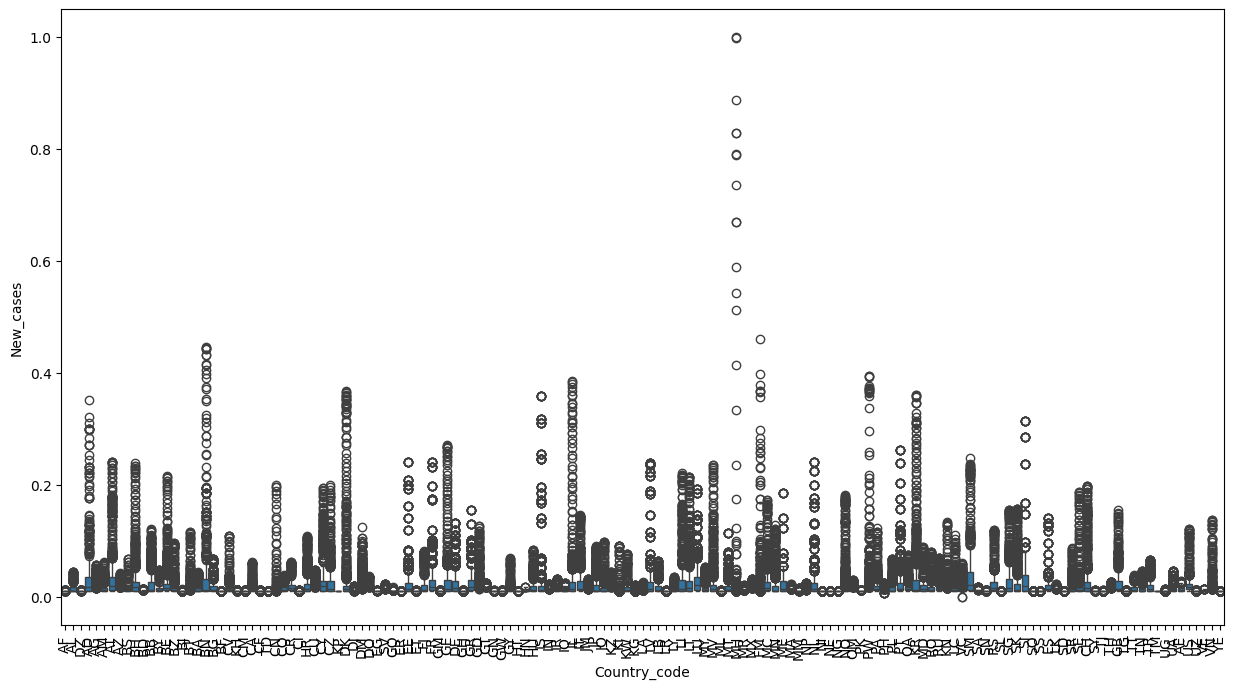

In [16]:
# BoxPlot dos novos casos separado por países
plt.figure(figsize=(15, 8))  # Ajuste o tamanho conforme necessário
sns.boxplot(x='Country_code', y='New_cases', data=data)
plt.xticks(rotation=90)  # Rótulos rotacionados para melhor visualização
plt.show()

In [566]:
# Visualizar a concentração de dados zeros
print(data['New_cases'].value_counts())

New_cases
2.566472e-05    120
2.630264e-05    117
1.375242e-06    108
5.858184e-08    108
5.132943e-05    106
               ... 
1.374920e-06      1
1.519649e-06      1
2.146805e-06      1
2.508626e-06      1
1.072046e-05      1
Name: count, Length: 46211, dtype: int64


In [18]:
# Visualizar a distruibuição de amostras por estação
data['season'].value_counts()

season
summer    56024
spring    54832
winter    51852
autumn    40528
Name: count, dtype: int64

In [19]:
# Transformando dados em formato de painel
panel_data = data

# Convertendo 'season' em variáveis dummy
panel_data['season'] = panel_data['season'].astype('category')
dummies = pd.get_dummies(panel_data['season'])

# Agora, junta as variáveis dummy de volta ao DataFrame
panel_data = pd.concat([panel_data, dummies], axis=1)

# Criando dataframe auxliar com variáveis dummy
aux = panel_data[['New_cases', 'autumn', 'spring', 'summer']].copy()
aux['spring'] = aux['spring'].astype(int)
aux['autumn'] = aux['autumn'].astype(int)
aux['summer'] = aux['summer'].astype(int)
# aux['winter'] = aux['winter'].astype(int)


aux


New_cases  autumn  spring  summer
Country_code Date_reported                                   
AF           2020-01-03           NaN       0       0       0
             2020-01-04           NaN       0       0       0
             2020-01-05           NaN       0       0       0
             2020-01-06           NaN       0       0       0
             2020-01-07           NaN       0       0       0
...                               ...     ...     ...     ...
YE           2023-09-23      0.010831       1       0       0
             2023-09-24      0.010831       1       0       0
             2023-09-25      0.010831       1       0       0
             2023-09-26      0.010831       1       0       0
             2023-09-27      0.010831       1       0       0

[203236 rows x 4 columns]

In [21]:
# # Modelo de Efeitos Fixos
# fe_model = PanelOLS.from_formula('New_cases ~ 1 + Population + Urban_population + Physicians_per_thousand + EntityEffects', aux, check_rank=False)
fe_model = PanelOLS.from_formula('New_cases ~ 1 + autumn + summer + spring + EntityEffects', aux)
fe_results = fe_model.fit()
print(fe_results)

# # Modelo de Efeitos Aleatórios
# re_model = RandomEffects.from_formula('New_cases ~ 1 +  autumn + summer + spring + EntityEffects', data=aux)
# re_results = re_model.fit()
# print(re_results)


c:\Users\Gedor\AppData\Local\Programs\Python\Python312\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:              New_cases   R-squared:                        0.0189
Estimator:                   PanelOLS   R-squared (Between):           3.546e-05
No. Observations:              203230   R-squared (Within):               0.0189
Date:                Wed, Nov 29 2023   R-squared (Overall):              0.0169
Time:                        17:06:04   Log-likelihood                  5.14e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1302.5
Entities:                         149   P-value                           0.0000
Avg Obs:                       1364.0   Distribution:                F(3,203078)
Min Obs:                       1358.0                                           
Max Obs:                       1364.0   F-statistic (robust):             1302.5
                            

In [579]:
# Teste de Hausman, para decidir entre efeitos fixos e efeitos aleatórios
from scipy import stats

psi = fe_results.cov.iloc[1:,1:] - re_results.cov.iloc[1:,1:]
diff = fe_results.params[1:] - re_results.params[1:]
W = -diff.dot(np.linalg.inv(-psi)).dot(-diff)
dof = re_results.params.size - 1
pvalue = stats.chi2(dof).sf(W)
print("Hausman Test: chisq = {0}, df = {1}, p-value = {2}".format(W, dof, pvalue))

Hausman Test: chisq = -1.827000901490152, df = 3, p-value = 1.0


In [ ]:
# Agrupamento de dados, caso necessário
# Selecting the specified columns
selected_columns = ['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
                    'Cumulative_cases', 'New_deaths', 'Cumulative_deaths', 'season', 
                    'Abbreviation', 'Population', 'Urban_population', 'Physicians per thousand']

# Grouping the data
grouped_data_selected_columns = data[selected_columns].set_index('Date_reported').groupby(['Country', 'Country_code']).resample('W').agg({
    'New_cases': 'sum',
    'Cumulative_cases': 'sum',
    'New_deaths': 'sum',
    'Cumulative_deaths': 'sum',
    'WHO_region': 'last',
    'season': 'last',
    'Abbreviation': 'last',
    'Population': 'last',
    'Urban_population': 'last',
    'Physicians per thousand': 'last'
}).reset_index()